[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary: {'could': 0, 'alice': 1, 'passage': 2, 'think': 3, 'things': 4, 'even': 5, 'head': 6, 'get': 7, 'would': 8, 'ever': 9, 'saw': 10, 'longed': 11, 'indeed': 12, 'dark': 13, 'loveliest': 14, 'hall': 15, 'wander': 16, 'among': 17, 'garden': 18, 'looked': 19, 'along': 20, 'bright': 21, 'knelt': 22, 'hole': 23, 'rat': 24, 'larger': 25, 'much': 26, 'small': 27, 'led': 28, 'found': 29, 'door': 30, 'opened': 31, 'beds': 32, 'fountains': 33, 'flowers': 34, 'wish': 35, 'lately': 36, 'happened': 37, 'way': 38, 'many': 39, 'see': 40, 'begin': 41, 'know': 42, 'telescope': 43, 'like': 44, 'shut': 45, 'oh': 46, 'cool': 47, 'shoulders': 48, 'without': 49, 'use': 50, 'little': 51, 'poor': 52, 'thought': 53, 'go': 54, 'doorway': 55, 'really': 56, 'begun': 57, 'impossible': 58}
Similar words to 'door':
('beds', 0.36491504311561584)
('much', 0.3305249512195587)
('shut', 0.32979297637939453)
('cool', 0.25908932089805603)
('wish', 0.243193581700325)
('oh', 0.24176433682441711)
('begun', 0.22129262

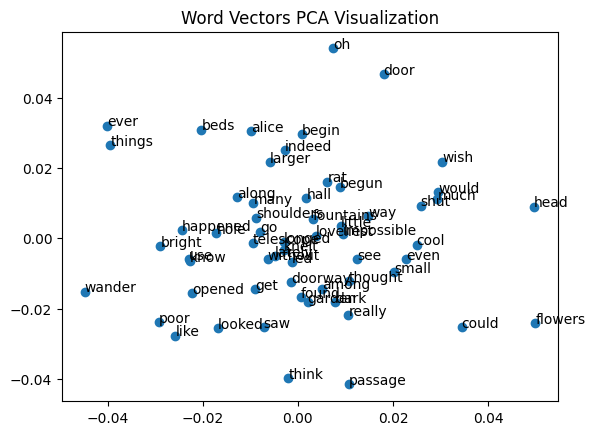

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re
import bs4 as bs
import urllib.request
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Scraping data from Wikipedia
scrapped_data = urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article = scrapped_data.read()
parsed_article = bs.BeautifulSoup(article, 'lxml')
paragraphs = parsed_article.find_all('p')
article_text = ""
for p in paragraphs:
    article_text += p.text

# Example sentences (you can use the scraped article as well)
sentences = """Alice 23 opened the door and found that it led into a
small 90
passage, not much larger than a rat-hole: she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders. Oh, how I wish
I could shut up like a telescope! I think I could, if I only
know how to begin.' For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.
"""

# Preprocessing the text
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = re.sub('[^A-Za-z]+', ' ', sentences)  # Remove special characters
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()  # Remove 1 letter words
sentences = sentences.lower()

# Tokenizing the text
all_sent = nltk.sent_tokenize(sentences)
all_words = [nltk.word_tokenize(sent) for sent in all_sent]

# Removing stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = data[0]  # Using the first sentence for context

# Training the Word2Vec model
model1 = Word2Vec(data, min_count=1, vector_size=52, window=5)

# Accessing vocabulary
vocabulary = model1.wv.key_to_index
print("Vocabulary:", vocabulary)

# Finding similar words
wrd = 'door'
v1 = model1.wv[wrd]
similar_words = model1.wv.most_similar(wrd)
print("Similar words to '{}':".format(wrd))
for x in similar_words:
    print(x)

# Preparing data for prediction
dat = []
for i in range(2, len(data1) - 2):
    context = [data1[i - 2], data1[i - 1], data1[i + 1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))

print("Sample context-target pairs:", dat[:5])

# Predicting the output word using most_similar for the context
i = 3
print("Context:", dat[i][0], "Target:", dat[i][1])

# Get similar words based on the context
context_vector = sum(model1.wv[word] for word in dat[i][0] if word in model1.wv)
context_vector /= len(dat[i][0])  # Average the context vectors

# Find the most similar words to the context vector
predicted_similar_words = model1.wv.similar_by_vector(context_vector, topn=5)
print("Predicted similar words based on context:", predicted_similar_words)

# PCA for visualization
X = model1.wv[model1.wv.index_to_key]  # Use index_to_key for all vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Vectors PCA Visualization")
plt.show()
